## Аюшиев Тимур Олегович РТ5-61Б, Вариант 1.

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import numpy as np

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.shape

(150, 4)

Первые 5 строк датасета.

In [2]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Наличие пустых строк

In [3]:
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [5]:
data.loc[0, 'sepal length (cm)'] = np.nan

# Удаление строк с пропусками
data.dropna(inplace=True)

## Корреляционная матрица

In [6]:
data['is_long_iris'] = np.where(data['sepal length (cm)'] > 5, 1, 0)
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_long_iris
sepal length (cm),1.000000,-0.112106,0.871281,0.816961,0.671808
sepal width (cm),-0.112106,1.000000,-0.423302,-0.360480,-0.043662
petal length (cm),0.871281,-0.423302,1.000000,0.962423,0.617184
petal width (cm),0.816961,-0.360480,0.962423,1.000000,0.597245
is_long_iris,0.671808,-0.043662,0.617184,0.597245,1.000000


Значение целевого признаца варьируется от 0 до 1.
Проведем корреляционный анализ по отношению к целевому признаку, можно увидеть наиболее коррелируемые признаки:
sepal_length(0.67)
petal_length(0.62)
Таким образом, их необходимо оставить в модели.
Менее коррелируемый признак: petal_width(0.6) - его также стоит оставить в модели.
Наименее коррелируемый с целевым признаком: petal_length(-0.04) - не учиывается в модели.

## Heat map

Воспользуемся тепловой картой для визуализации корреляционной матрицы.
Рассмотрим построение корреляционной матрицы с использованием коэффициентов Пиросна, Кендалла и Спирмана.

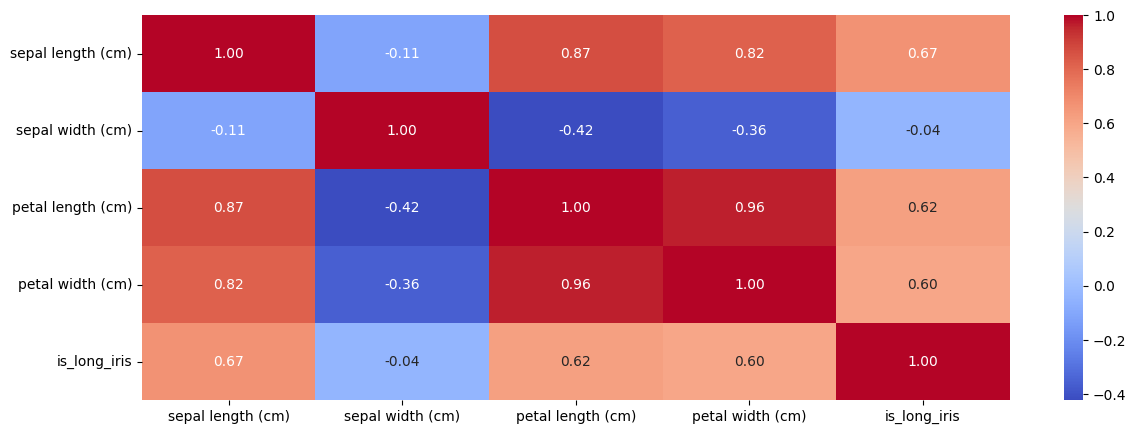

In [7]:
pearson_corr = data.corr(method='pearson')

plt.figure(figsize=(14, 5))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm' )
plt.show()

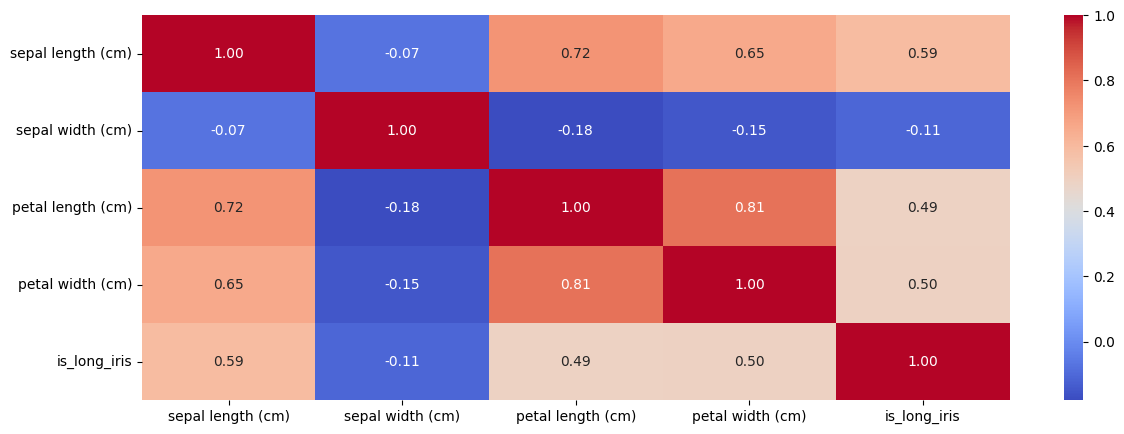

In [8]:
kendall_corr = data.corr(method='kendall')

plt.figure(figsize=(14,5))
sns.heatmap(kendall_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

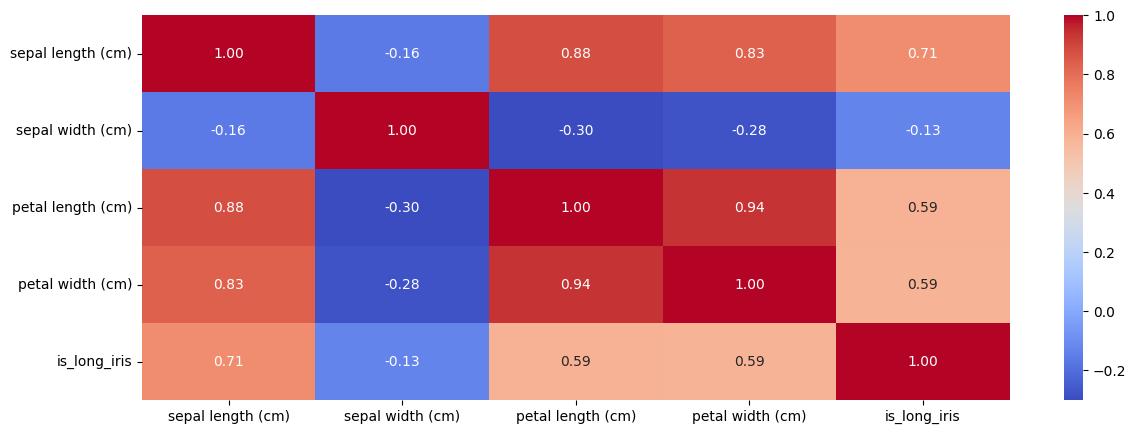

In [9]:
spearman_corr = data.corr(method='spearman')

plt.figure(figsize=(14,5))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Диаграмма рассеяния.

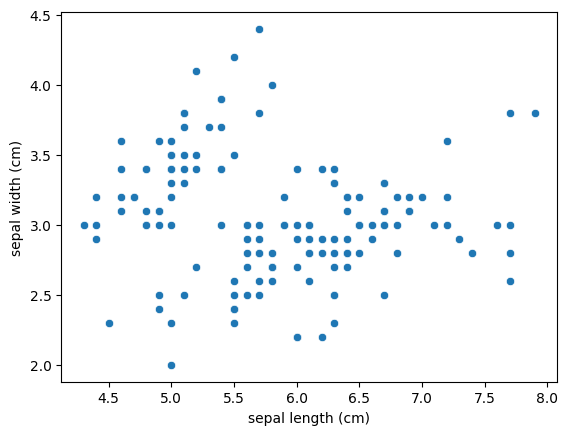

In [10]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=data)
plt.show()